In [22]:
# import packages for later use
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.close("all")

In [24]:
# load data
train_data = pd.read_csv('./data/train.csv')
train_data_for_corr = pd.read_csv('./data/train.csv')

### Unprocessed Training Table:

In [8]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Getting lists of numerical and categorical attributes:

In [31]:
numerical = train_data.dtypes[train_data.dtypes != "object"].index

print("Numerical attributes: {}".format(numerical))
print("Number of numerical attributes: {}".format(len(numerical)))

categorical = train_data.dtypes[train_data.dtypes == "object"].index

print("Categorical attributes: {}".format(categorical))
print("Number of categorical attributes: {}".format(len(categorical)))

Numerical attributes: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of numerical attributes: 38
Categorical attributes: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

### Training Data Description:

In [27]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The statistics shown above descibe the numerical categories.

### Numerical Attributes with missing values:

In [28]:
for i in range(len(numerical)): 
    missing = train_data[numerical[i]].isnull().sum()
    
    if missing:
        print("{} : {}".format(numerical[i], missing))

LotFrontage : 259
MasVnrArea : 8
GarageYrBlt : 81


Overwrite empty values for numerical attributes with the mean for the attribute, as to not affect current statistics for the attribute:

In [29]:
for i in range(len(numerical)):
    missing = train_data[numerical[i]].isnull().sum()
    
    if missing:
        train_data[numerical[i]].fillna(0, inplace=True)
    
sum_missing = 0

for i in range(len(numerical)):
    sum_missing += train_data[numerical[i]].isnull().sum()
    
print("Number of missing numerical attribute entities: {}".format(sum_missing))

Number of missing numerical attribute entities: 0


### Distribution of the Sale Price:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


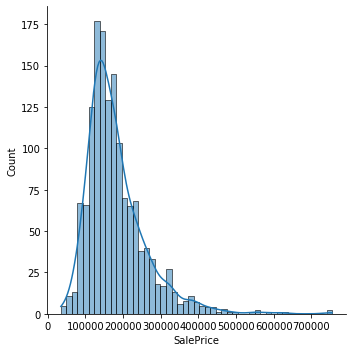

In [30]:
sns.displot(train_data["SalePrice"], kde=True)

As the data is not normally distributed and contains a significant right skew. Performance of the model would improve by applying a transformation on the Sales Price, below is the results of applying a log transformation.

### Distribution of the Sale Price with Log Scale:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


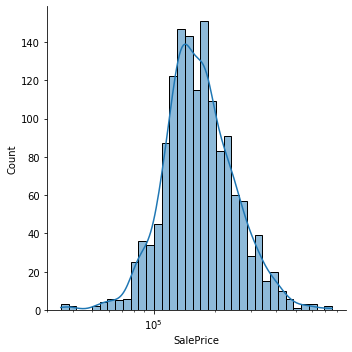

In [17]:
sns.displot(train_data["SalePrice"], kde=True, log_scale=True)

### Statistics about the Numerical/Continuous Variables:

As the log(Sales Price) was more normally distributed than the regular Sales Price, we felt is was better to analyze the relationship between log(Sales Price) and the numerical attributes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


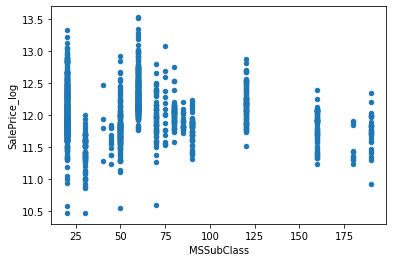

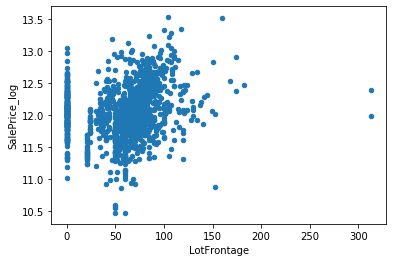

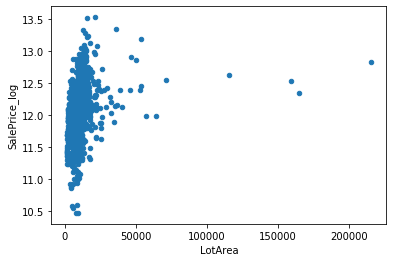

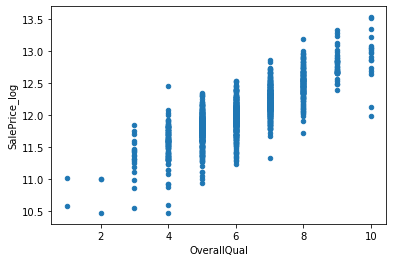

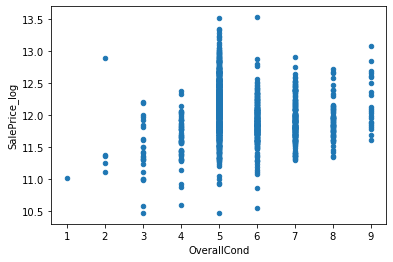

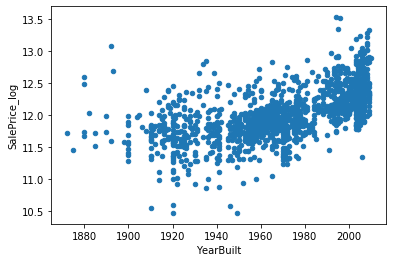

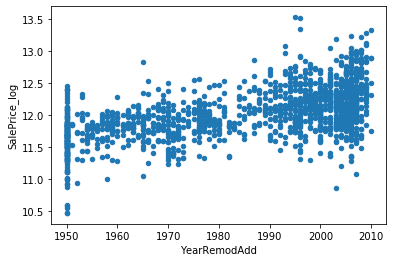

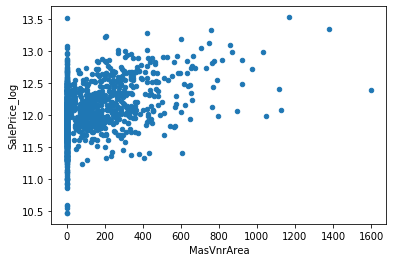

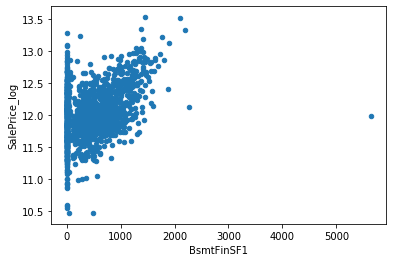

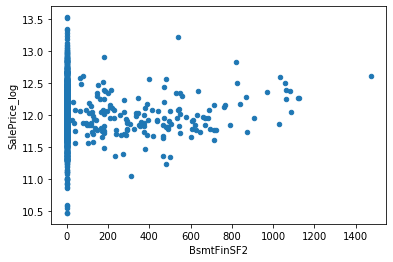

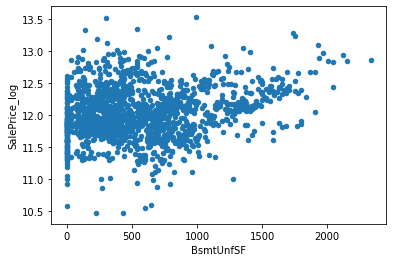

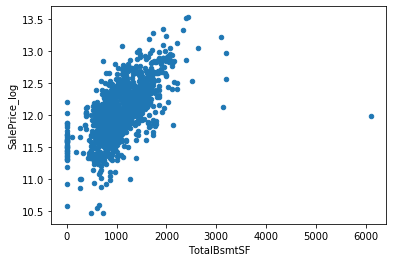

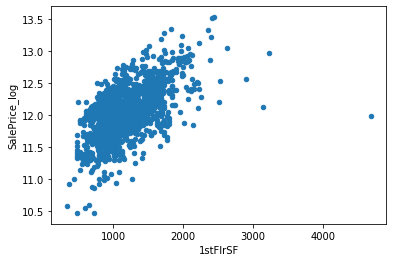

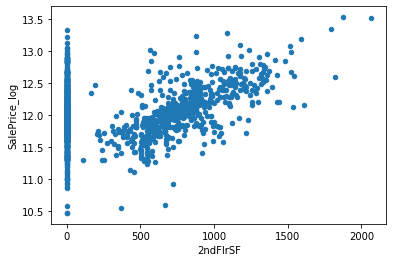

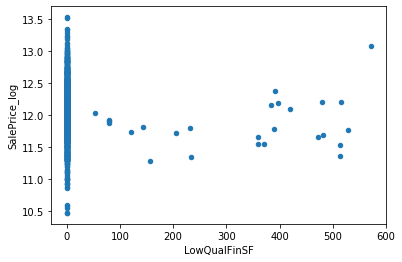

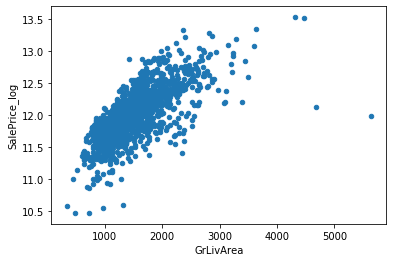

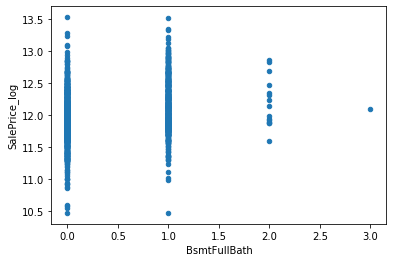

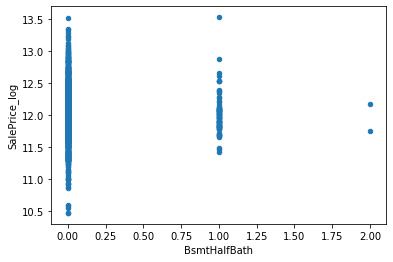

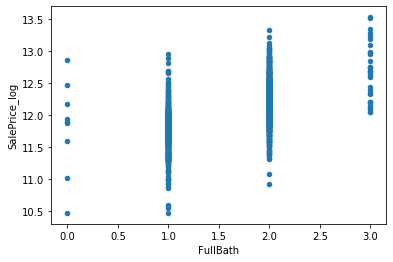

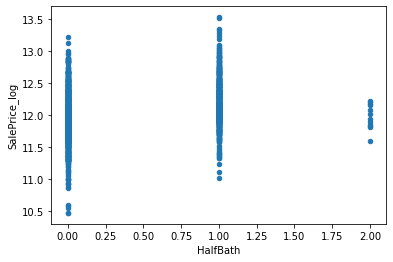

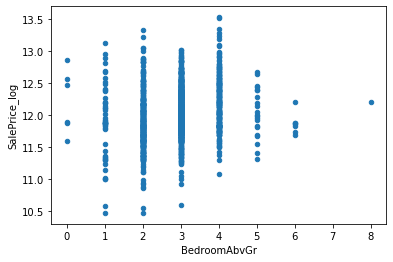

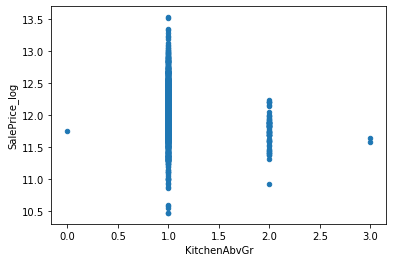

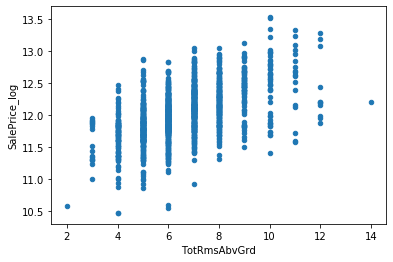

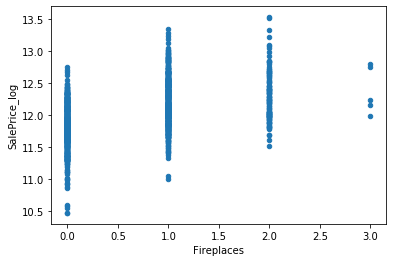

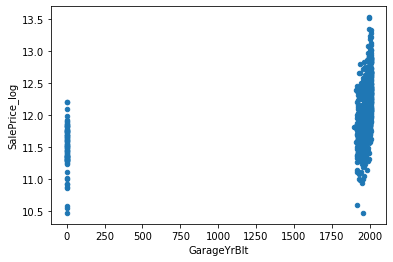

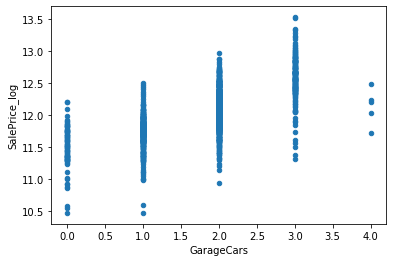

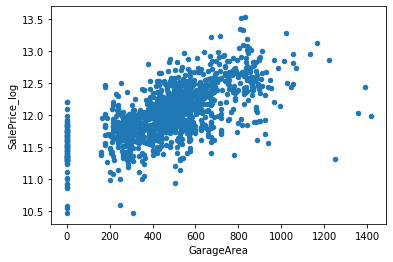

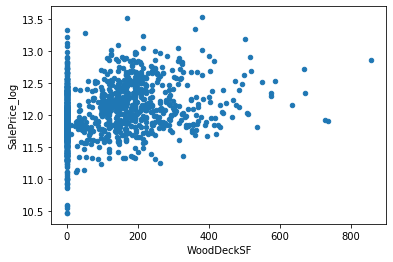

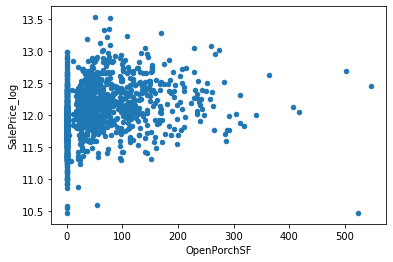

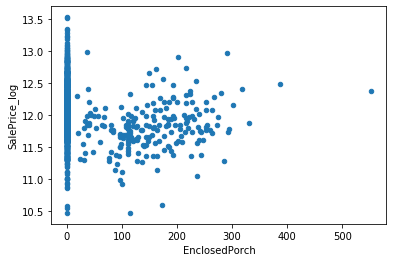

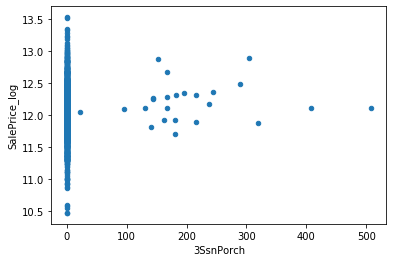

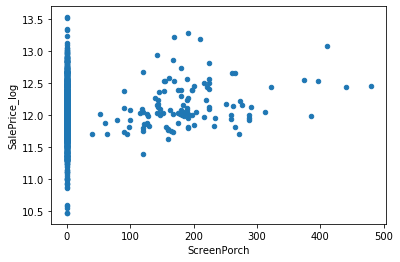

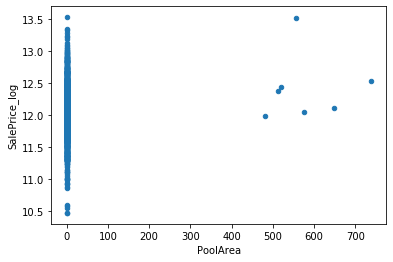

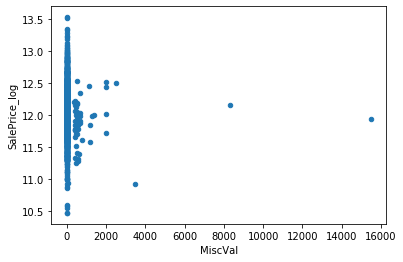

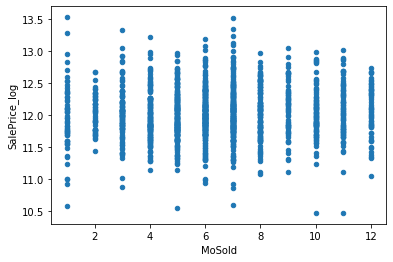

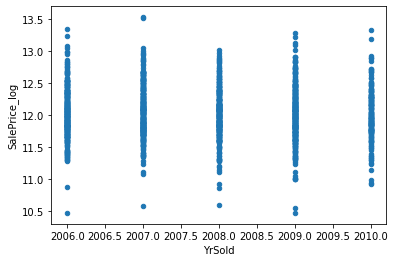

In [21]:
avoid_plot = ["Id", "SalePrice"]

train_data['SalePrice_log'] = np.log(train_data['SalePrice'])
train_data_for_corr['SalePrice_log'] = np.log(train_data_for_corr['SalePrice'])

for curr_x in numerical:
    
    if curr_x not in avoid_plot:
        
#         d = np.polyfit(train_data[curr_x],train_data['SalePrice_log'],1)
#         f = np.poly1d(d)
        
        #data = train_data['SalePrice_log']
        #sns.scatterplot(data)
        data = pd.concat([train_data['SalePrice_log'], train_data[curr_x]], axis=1)
        data.plot.scatter(x=curr_x, y='SalePrice_log')

/Users/harsharayudu/anaconda3/envs/2021-HW/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


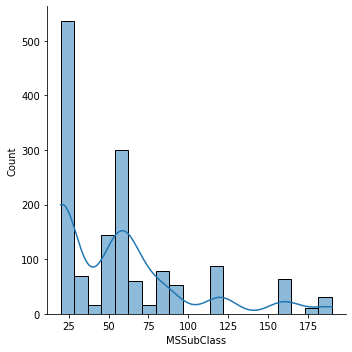

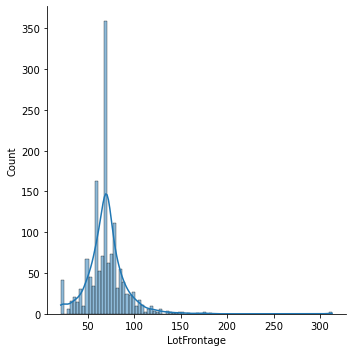

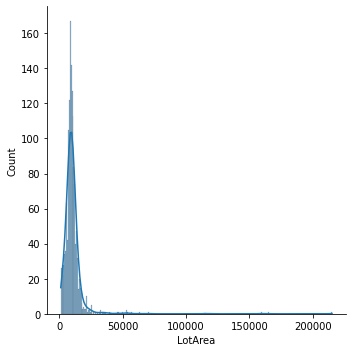

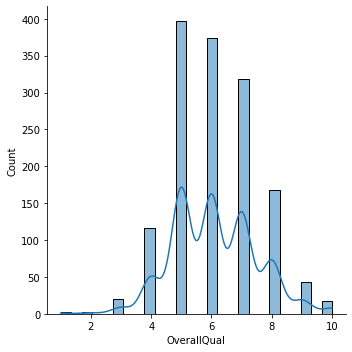

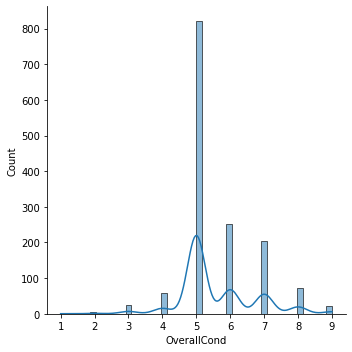

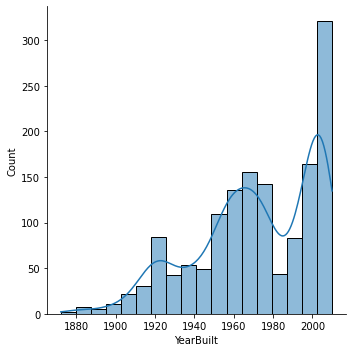

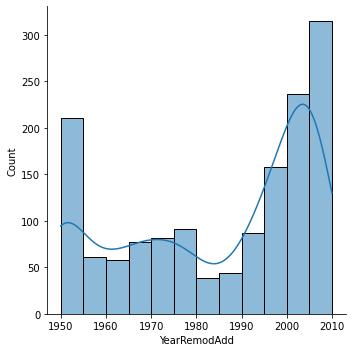

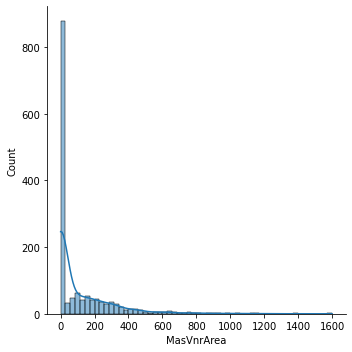

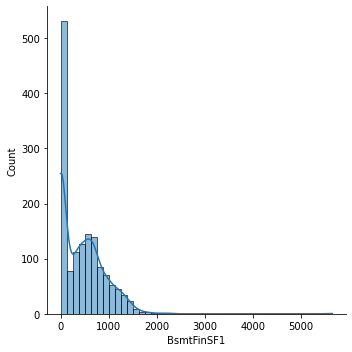

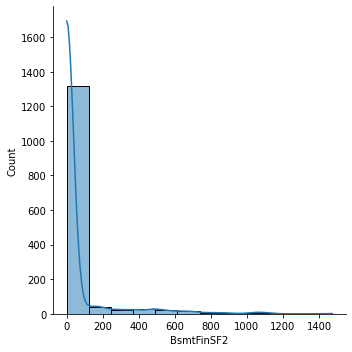

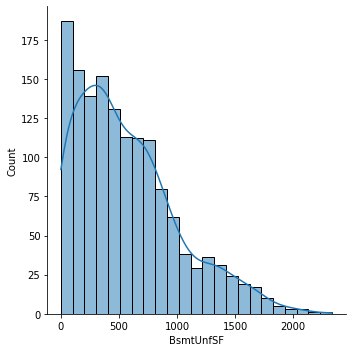

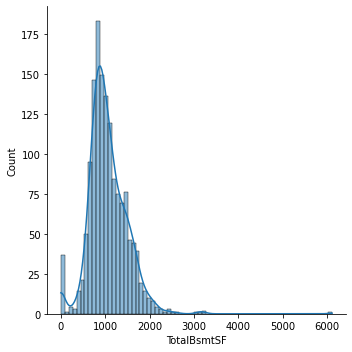

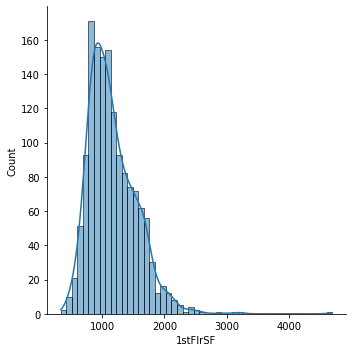

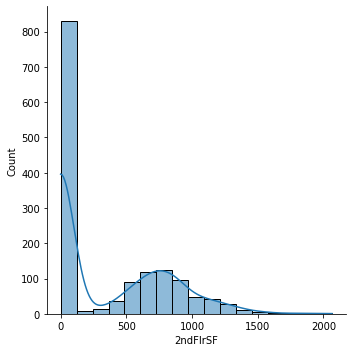

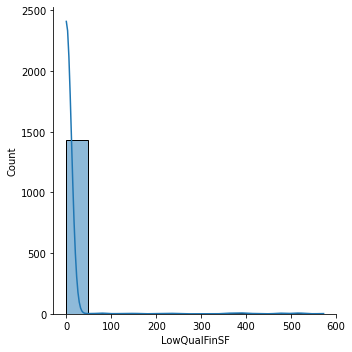

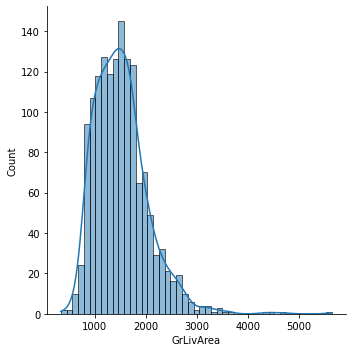

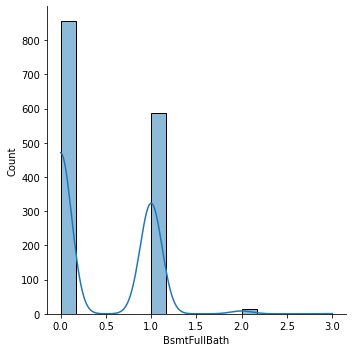

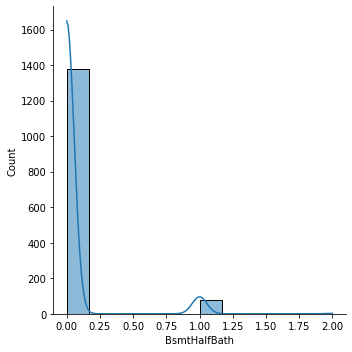

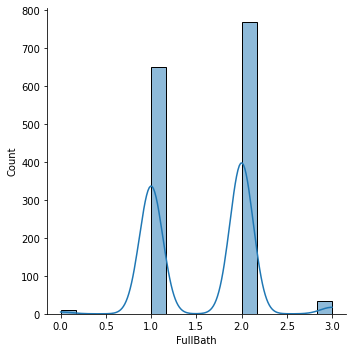

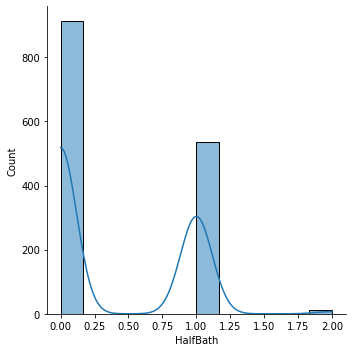

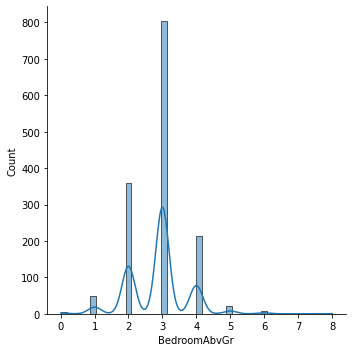

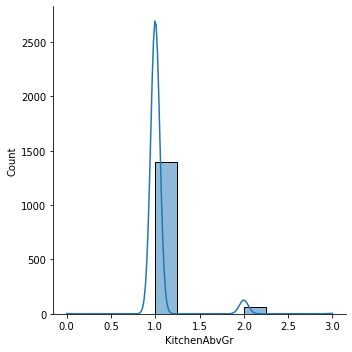

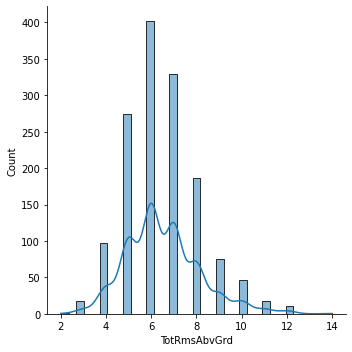

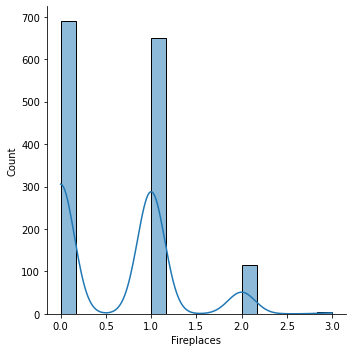

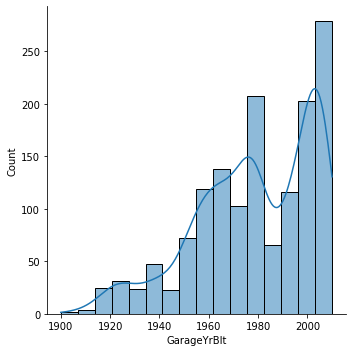

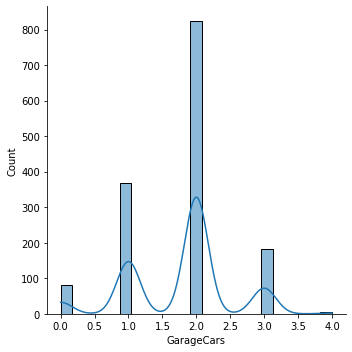

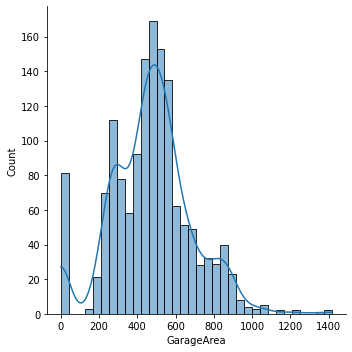

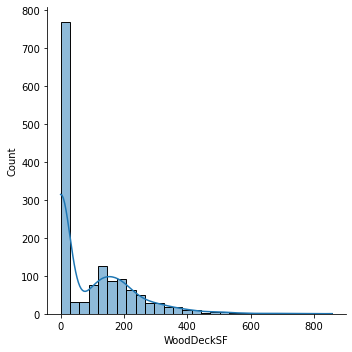

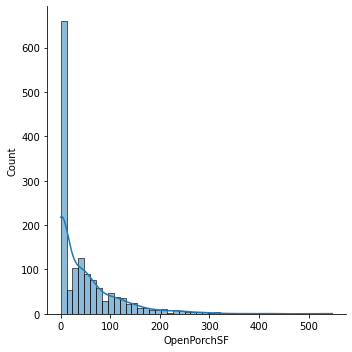

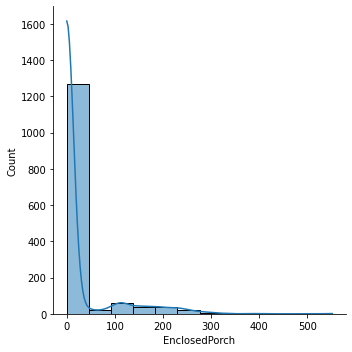

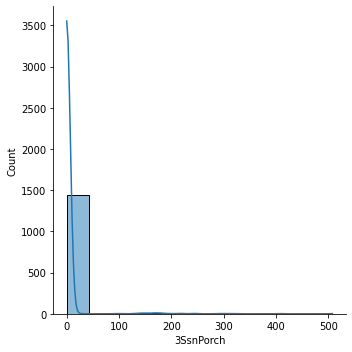

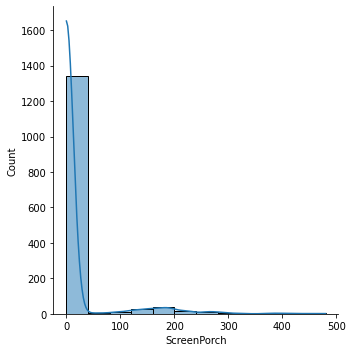

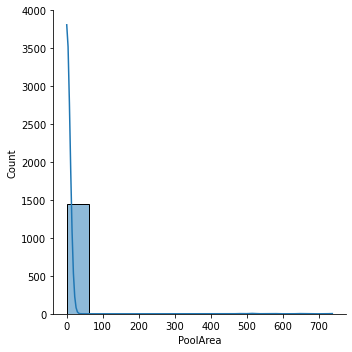

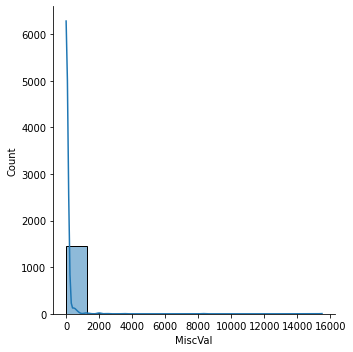

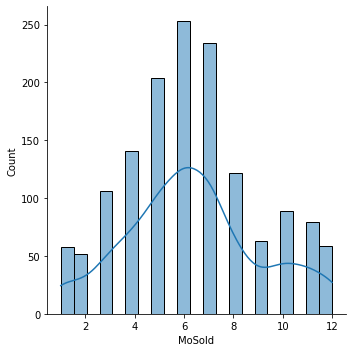

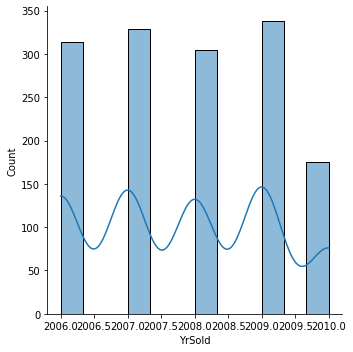

In [24]:

for i in numerical:
    if i not in avoid_plot:
        sns.displot(train_data[i], kde=True)

### Correlation

In [25]:
numerical_attr = train_data.select_dtypes(include = ['float64', 'int64'])

numerical_attr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216


Below we analyze the correlation between the numerical attributes and SalePrice_log, while also removing any fields that are empty to not affect calculations. We also identify numerical attributes which we believe are highly correlated with the SalePrice log.

In [51]:
# List to keep track of highly correlated numerical attributes
high_corr = []

for i in numerical:
    
    if i not in avoid_plot:
        corrFrame = train_data_for_corr[[i, 'SalePrice_log']]
        corrFrame = corrFrame[corrFrame[i] != 0]
        corrVal = abs(corrFrame.corr()['SalePrice_log'][0])
        if corrVal >= 0.5:    
            print("{} \t: {} <----".format(i, corrVal))
            high_corr.append(i)
        else:
            print("{} \t: {}".format(i, corrVal))

print(high_corr)

MSSubClass 	: 0.07395901733239736
LotFrontage 	: 0.355878470385983
LotArea 	: 0.25731989235273783
OverallQual 	: 0.8171844179216803 <----
OverallCond 	: 0.036867987730284206
YearBuilt 	: 0.5865702403842264 <----
YearRemodAdd 	: 0.565607832591179 <----
MasVnrArea 	: 0.37911202264632043
BsmtFinSF1 	: 0.44945034231583236
BsmtFinSF2 	: 0.20465690412787457
BsmtUnfSF 	: 0.16983239048793966
TotalBsmtSF 	: 0.596070758901755 <----
1stFlrSF 	: 0.5969810450343734 <----
2ndFlrSF 	: 0.682130951764829 <----
LowQualFinSF 	: 0.23110897599669475
GrLivArea 	: 0.7009266525441309 <----
BsmtFullBath 	: 0.019490544178141472
BsmtHalfBath 	: 0.025631475335441585
FullBath 	: 0.6065826478035261 <----
HalfBath 	: 0.08906880658179099
BedroomAbvGr 	: 0.22215597709807597
KitchenAbvGr 	: 0.1509307214161607
TotRmsAbvGrd 	: 0.5344222037231263 <----
Fireplaces 	: 0.10582633154947359
GarageYrBlt 	: 0.5410728625958745 <----
GarageCars 	: 0.6537736491489539 <----
GarageArea 	: 0.6118747740870886 <----
WoodDeckSF 	: 0.2009

These following variables were identified as highly correlated ( >= 0.5) and will be considered important variables for our predictive model:
- 'OverallQual'
- 'YearBuilt'
- 'YearRemodAdd'
- 'TotalBsmtSF'
- '1stFlrSF'
- '2ndFlrSF'
- 'GrLivArea'
- 'FullBath'
- 'TotRmsAbvGrd'
- 'GarageYrBlt'
- 'GarageCars'
- 'GarageArea'

### Data Correlation

We also want to analyze the relationship the different numerical attributes possess with each other, to see the correlation between the different attributes. We hope to reduce multicollinearity through this process, to preserve performance of future predictive models.

Data Correlation is visualized in correlation matrix:

<AxesSubplot:>

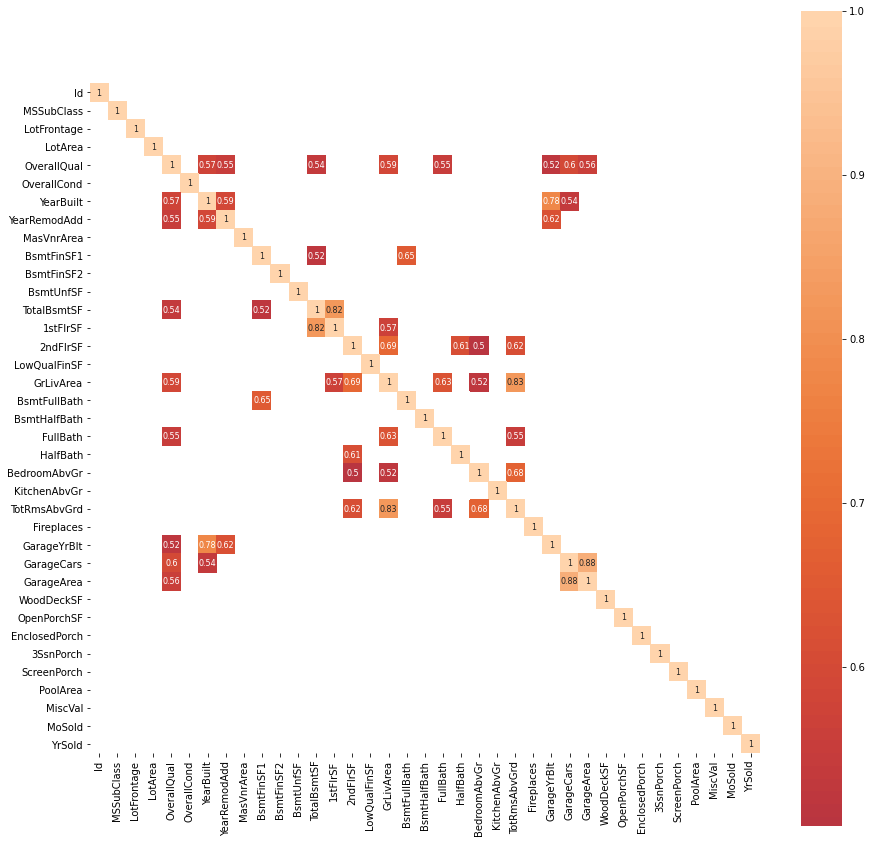

In [69]:
correlations = numerical_attr.drop(['SalePrice', 'SalePrice_log'], axis=1).corr()

# fig, ax = plt.subplots(figsize=(100,100))
# sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
# plt.show();
plt.figure(figsize=(15, 15))
sns.heatmap(correlations[(correlations >= 0.5)], center=0, square=True, annot=True, annot_kws={"size": 8})


Based on the correlation matrix for the numerical attributes, we can see that certain attributes are highly correlated with each other, this might be due to the definition of the attributes.

The list of highly correlated numerical attributes are (correlation >= 0.7): 
- GarageYrBlt + YearBuilt. (0.78)
- TotRmsAbvGrd + GrLivArea. (0.83)
- GarageCars + GarageArea. (0.88)
- 1stFlrSF + TotalBsmtSF. (0.82)

Our initial set of highly correlated numerical attributes include: 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea'.

These were specific attributes that we have selected for our utilizing in our model. 

Based on the Data correlation analysis, we believe that we can eliminate the GarageArea from this initial list, as it is highly correlared with GarageCars. Based on the definition of the variables, we can also see that the number of cars a garage can hold is heavily influenced by the garage area. Both variables represent similar information, however, GarageCars has a higher correlation with SalesPrice_log than GarageArea.

We believe that it is necessary to preserve the other set of variables that are highly correlated with each other. As not all houses contain garages and it can be understandable that some houses have garages built in a different year from when it was built. They both represent different information. Total rooms above ground differs from Ground Living Area, as rooms in different houses can vary in size, therefore, it can be difficult to think of both of these variables as representing the same information. First Floor SF and Total Basement SF will both be preserved as while these values can be similar, not all houses will contain basements, so discarding any of these two variables risks us discarding important information.


Our Final list of variables includes: 
- 'OverallQual'
- 'YearBuilt'
- 'YearRemodAdd'
- 'TotalBsmtSF'
- '1stFlrSF'
- '2ndFlrSF'
- 'GrLivArea'
- 'FullBath'
- 'TotRmsAbvGrd'
- 'GarageYrBlt'
- 'GarageCars'